https://machinelearningmastery.com/keras-functional-api-deep-learning/

## Sequential Model

In [28]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

In [1]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(2, input_dim=1), Dense(1)])

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [31]:
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


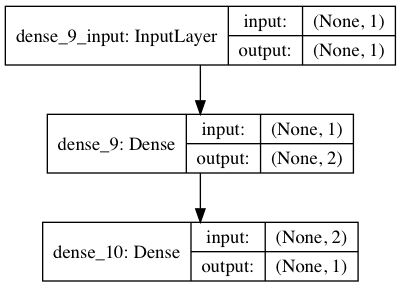

In [33]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

## Functional Model

In [71]:
from keras.models import Model
from keras.layers import Input, Dense
# Inputはミニバッチの次元は省略する
visible = Input(shape=(2, ))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


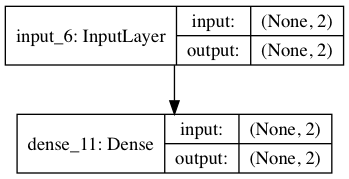

In [36]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

## Multilayer Perceptron

In [40]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense

visible = Input(shape=(10, ))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
print(model.summary())
plot_model(model, to_file='multilayer_perceptron_graph.png',
           show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None


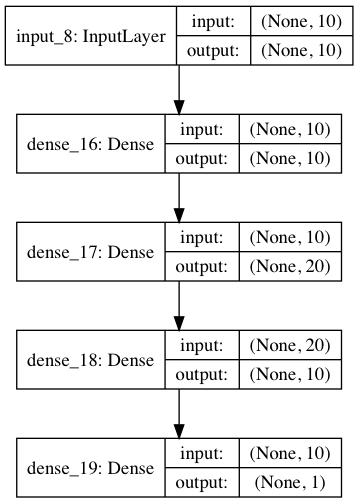

In [41]:
Image('multilayer_perceptron_graph.png')

## Convolutional Neural Network

In [45]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

visible = Input(shape=(64, 64, 1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
hidden1 = Dense(10, activation='relu')(pool2)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
model.summary()
plot_model(model, to_file='cnn.png', show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dense_20 (Dense)             (None, 13, 13, 10)        170       
_________________________________________________________________
dense_21 (Dense)             (None, 13, 13, 1)         11        
Total para

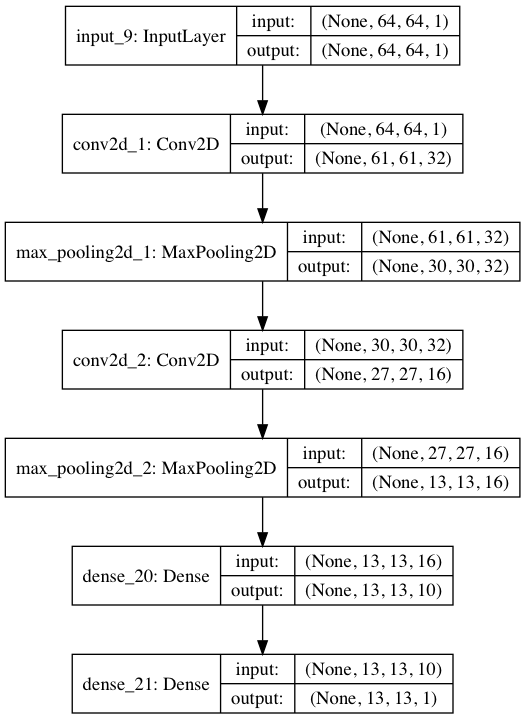

In [46]:
Image('cnn.png')

## Recurrent Neural Network

In [69]:
# from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM

visible = Input(shape=(100, 1))
hidden1 = LSTM(10)(visible)  # 系列の最後の出力のみ返す
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
model.summary()
plot_model(model, to_file='rnn.png', show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 100, 1)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 10)                480       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


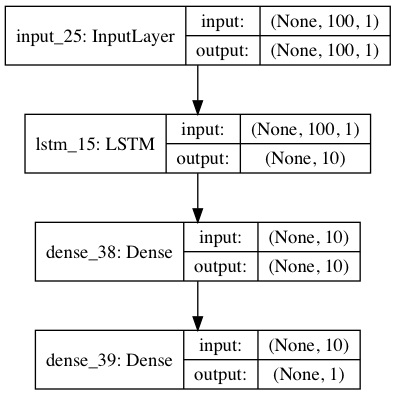

In [70]:
Image('rnn.png')

## Shared Input Layer

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_30 (InputLayer)            (None, 64, 64, 1)     0                                            
____________________________________________________________________________________________________
conv2d_9 (Conv2D)                (None, 61, 61, 32)    544         input_30[0][0]                   
____________________________________________________________________________________________________
conv2d_10 (Conv2D)               (None, 57, 57, 16)    1040        input_30[0][0]                   
____________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)   (None, 30, 30, 32)    0           conv2d_9[0][0]                   
___________________________________________________________________________________________

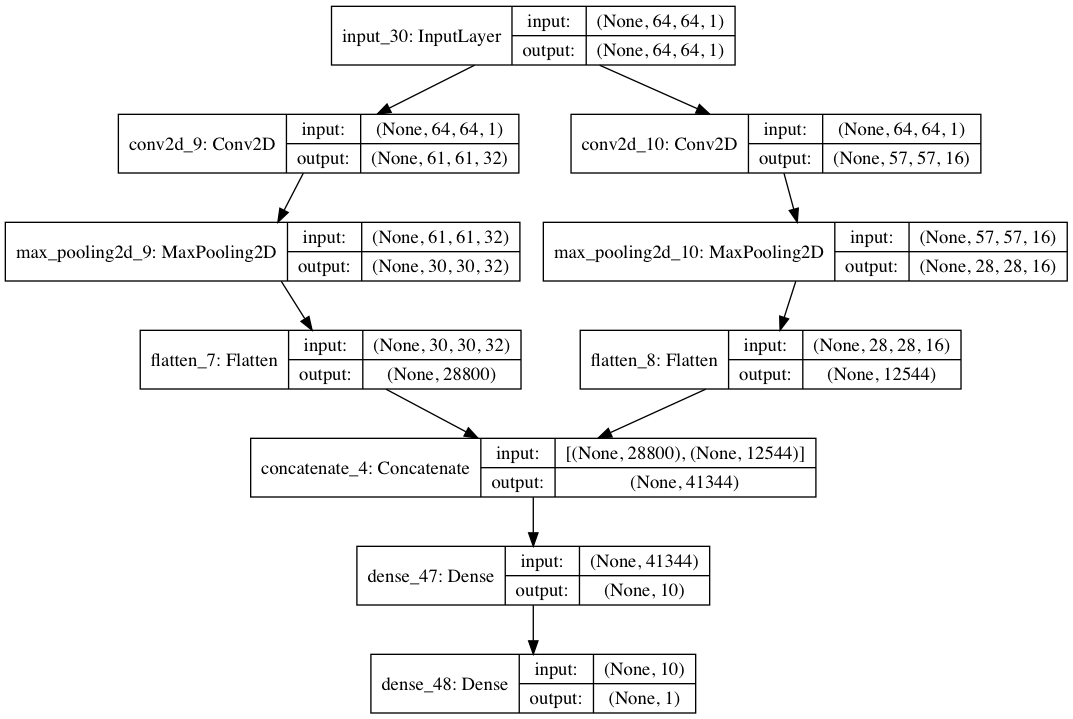

In [75]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

visible = Input(shape=(64, 64, 1))

# first feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)

# second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)

# merge feature extractors
merge = concatenate([flat1, flat2])

# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

model.summary()
plot_model(model, to_file='shared_input_layer.png', show_shapes=True)
Image('shared_input_layer.png')

## Shared Feature Extraction Layer

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_32 (InputLayer)            (None, 100, 1)        0                                            
____________________________________________________________________________________________________
lstm_17 (LSTM)                   (None, 10)            480         input_32[0][0]                   
____________________________________________________________________________________________________
dense_55 (Dense)                 (None, 10)            110         lstm_17[0][0]                    
____________________________________________________________________________________________________
dense_56 (Dense)                 (None, 20)            220         dense_55[0][0]                   
___________________________________________________________________________________________

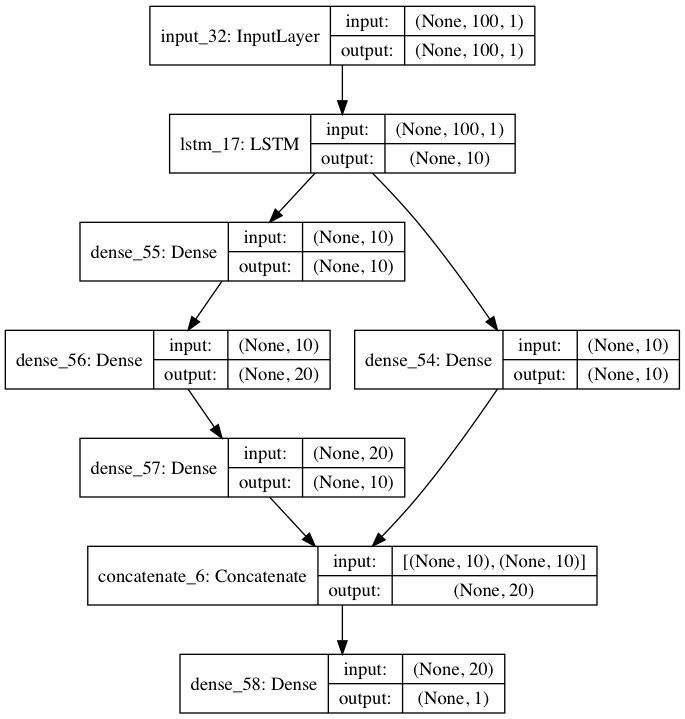

In [77]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate

visible = Input(shape=(100, 1))

# feature extraction
extract1 = LSTM(10)(visible)

# first interpretation model
interp1 = Dense(10, activation='relu')(extract1)

# second interpretation model
interp21 = Dense(10, activation='relu')(extract1)
interp22 = Dense(20, activation='relu')(interp21)
interp23 = Dense(10, activation='relu')(interp22)

# merge interpretation
merge = concatenate([interp1, interp23])

# output
output = Dense(1, activation='sigmoid')(merge)
model = Model(inputs=visible, outputs=output)

model.summary()
plot_model(model, to_file='shared_feature_extractor.png', show_shapes=True)

Image('shared_feature_extractor.png')

## Multiple Input Model

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_40 (InputLayer)            (None, 64, 64, 1)     0                                            
____________________________________________________________________________________________________
input_41 (InputLayer)            (None, 32, 32, 3)     0                                            
____________________________________________________________________________________________________
conv2d_25 (Conv2D)               (None, 61, 61, 32)    544         input_40[0][0]                   
____________________________________________________________________________________________________
conv2d_27 (Conv2D)               (None, 29, 29, 32)    1568        input_41[0][0]                   
___________________________________________________________________________________________

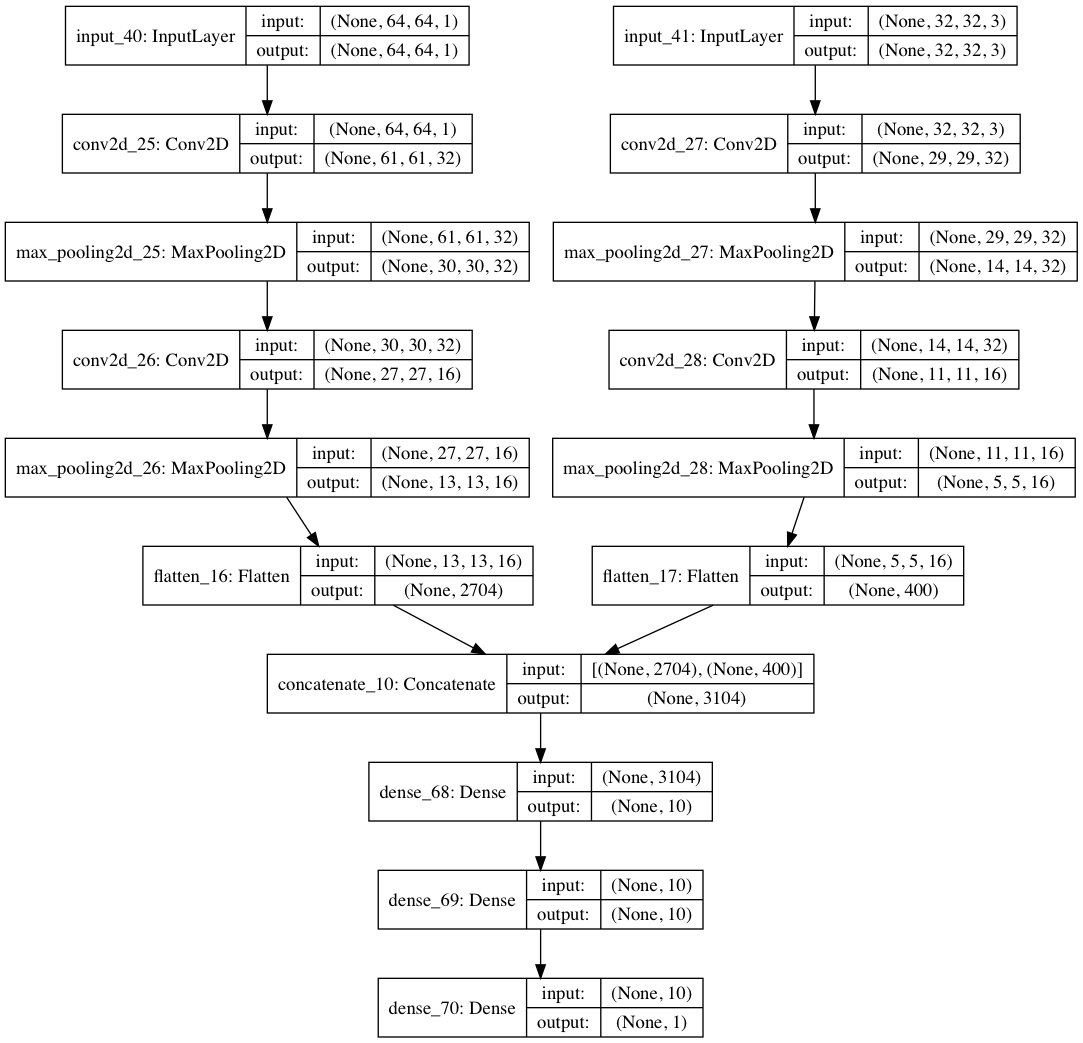

In [82]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# first input model
visible1 = Input(shape=(64, 64, 1))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)

# second input model
visible2 = Input(shape=(32, 32, 3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)

# merge input models
merge = concatenate([flat1, flat2])

# interpretation model
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=[visible1, visible2], outputs=output)

model.summary()
plot_model(model, to_file='multiple_inputs.png', show_shapes=True)
Image('multiple_inputs.png')

## Multipe Output Model

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_45 (InputLayer)            (None, 100, 1)        0                                            
____________________________________________________________________________________________________
lstm_24 (LSTM)                   (None, 100, 10)       480         input_45[0][0]                   
____________________________________________________________________________________________________
lstm_25 (LSTM)                   (None, 10)            840         lstm_24[0][0]                    
____________________________________________________________________________________________________
dense_78 (Dense)                 (None, 10)            110         lstm_25[0][0]                    
___________________________________________________________________________________________

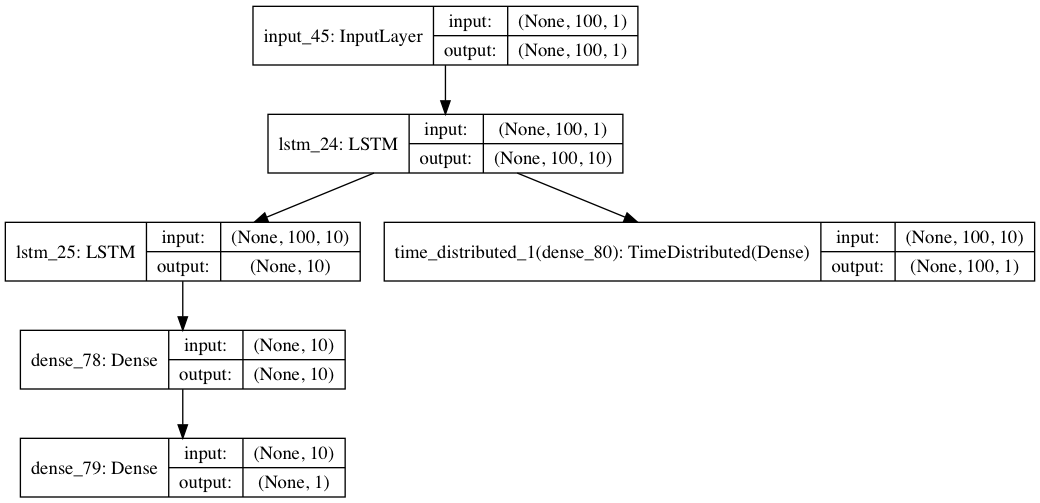

In [87]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed

visible = Input(shape=(100, 1))

# feature extraction
# return_sequences=Trueだと入力の各系列に対して出力する
extract = LSTM(10, return_sequences=True)(visible)

# classification output
class11 = LSTM(10)(extract)
class12 = Dense(10, activation='relu')(class11)
output1 = Dense(1, activation='sigmoid')(class12)

# sequence output
output2 = TimeDistributed(Dense(1, activation='linear'))(extract)

model = Model(inputs=visible, outputs=[output1, output2])
model.summary()
plot_model(model, to_file='multiple_output.png', show_shapes=True)
Image('multiple_output.png')